Аналитическая задача -- составить портрет клиента, склонного откликнуться на предложение о новой карте.

## Описание данных

|Комментарий| Признак|
|--:|:--|
|Ипотечный кредит | mortgage|
|Страхование жизни | life_ins|
|Кредитная карта | cre_card|
|Дебетовая карта | deb_card|
|Мобильный банк | mob_bank|
|Текущий счет | curr_acc|
|Интернет-доступ к счету | internet|
|Индивидуальный заем | perloan|
|Наличие сбережений | savings|
|Пользование банкоматом за последнюю неделю | atm_user|
|Пользование услугами онлайн-маркетплейса за последний месяц | markpl|
|Возраст | age |
|Давность клиентской истории | cus_leng |
|Отклик на предложение новой карты | response |

Примечание: 1 -- наличие продукта/услуги/отклика; 0 -- отсутствие продукта/услуги/отклика.

**Примерный план исследования**

Шаг 1. Загрузка данных;

Шаг 2. Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

Шаг 3. Исследовательский анализ данных
- в разрезе значений целевого признака (`response` -- Отклик на предложение новой карты	) исследовать распределения признаков;
- исследовать возможные зависимости целевого признака от объясняющих признаков;
- в разрезе целевого признака составить портреты клиентов платежной системы;

Шаг 4. Составить и проверить гипотезы о наличие/отсутствии различий по признакам портрета клиента.

Шаг 5. Построить классификационные модели (дополнительное задание).


## 1. Загрузка данных

Подключение библиотек.

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import kstest
from scipy.stats import mannwhitneyu

Загрузка исходных данных.

In [ ]:
df = pd.read_csv('/content/vrk_response_bank.csv', delimiter=';')
df

,mortgage,life_ins,cre_card,deb_card,mob_bank,curr_acc,internet,perloan,savings,atm_user,markpl,age,cus_leng,response
0,0,0,0,0,0,0,0,0,0,0,0,18,1,0
1,1,1,0,1,1,0,0,0,0,1,0,18,2,1
2,1,1,0,1,0,0,0,0,0,0,1,18,2,1
3,1,1,1,1,0,1,0,0,0,1,1,18,2,1
4,1,1,0,1,0,0,0,1,0,1,0,18,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30254,1,1,1,1,0,1,1,0,1,1,1,63,3,0
30255,0,1,1,0,0,0,0,0,0,0,0,63,2,1
30256,1,1,1,1,0,1,0,0,1,1,1,63,3,0
30257,1,1,1,0,0,1,1,0,1,1,1,63,3,0


## 2. Первичная обработка данных

Просмотр информации о датафрейме, воспользуемся методом `.info()`.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30259 entries, 0 to 30258
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mortgage  30259 non-null  int64
 1   life_ins  30259 non-null  int64
 2   cre_card  30259 non-null  int64
 3   deb_card  30259 non-null  int64
 4   mob_bank  30259 non-null  int64
 5   curr_acc  30259 non-null  int64
 6   internet  30259 non-null  int64
 7   perloan   30259 non-null  int64
 8   savings   30259 non-null  int64
 9   atm_user  30259 non-null  int64
 10  markpl    30259 non-null  int64
 11  age       30259 non-null  int64
 12  cus_leng  30259 non-null  int64
 13  response  30259 non-null  int64
dtypes: int64(14)
memory usage: 3.2 MB


**Вывод**: в датафрейме содержится 30259 записей, можно отметить отсутствие пропусков, заголовки признаков и типы данных не нуждаются в преобразовании.

Просмотр описательных статистик признаков, воспользуемся методом `.describe()`.

Для удобства сделаем расшифровку названий признаков.

In [ ]:
dict_to_rus = {
'mortgage' : 'ипотечный кредит',
'life_ins' : 'страхование жизни',
'cre_card' : 'кредитная карта',
'deb_card' : 'дебетовая карта',
'mob_bank' : 'мобильный банк',
'curr_acc' : 'текущий счет',
'internet' : 'интернет-доступ к счету',
'perloan' : 'индивидуальный заем',
'savings' : 'наличие сбережений',
'atm_user' : 'пользование банкоматом за последнюю неделю',
'markpl' : 'пользование онлайн-маркетплейсом за посл. месяц',
'age' : 'возраст',
'cus_leng' : 'давность клиентской истории',
'response' : 'отклик на предложение новой карты'}

In [ ]:
pd.DataFrame(list(dict_to_rus.values()), index = list(dict_to_rus.keys()), columns = ['расшифровка'])

,расшифровка
mortgage,ипотечный кредит
life_ins,страхование жизни
cre_card,кредитная карта
deb_card,дебетовая карта
mob_bank,мобильный банк
curr_acc,текущий счет
internet,интернет-доступ к счету
perloan,индивидуальный заем
savings,наличие сбережений
atm_user,пользование банкоматом за последнюю неделю


In [ ]:
pd.concat([pd.DataFrame(list(dict_to_rus.values()), index = list(dict_to_rus.keys()), columns = ['расшифровка']),
           df.describe().T], axis = 1)

,расшифровка,count,mean,std,min,25%,50%,75%,max
mortgage,ипотечный кредит,30259.0,0.741102,0.438037,0.0,0.0,1.0,1.0,1.0
life_ins,страхование жизни,30259.0,0.905384,0.292689,0.0,1.0,1.0,1.0,1.0
cre_card,кредитная карта,30259.0,0.679963,0.466498,0.0,0.0,1.0,1.0,1.0
deb_card,дебетовая карта,30259.0,0.618361,0.485797,0.0,0.0,1.0,1.0,1.0
mob_bank,мобильный банк,30259.0,0.122079,0.327383,0.0,0.0,0.0,0.0,1.0
curr_acc,текущий счет,30259.0,0.806471,0.395071,0.0,1.0,1.0,1.0,1.0
internet,интернет-доступ к счету,30259.0,0.210483,0.407658,0.0,0.0,0.0,0.0,1.0
perloan,индивидуальный заем,30259.0,0.146535,0.353648,0.0,0.0,0.0,0.0,1.0
savings,наличие сбережений,30259.0,0.288575,0.453107,0.0,0.0,0.0,1.0,1.0
atm_user,пользование банкоматом за последнюю неделю,30259.0,0.606266,0.488585,0.0,0.0,1.0,1.0,1.0


**Вывод**: анализ значений описательных статистик:
1. Ипотечный кредит имеют 74% клиентов.
2. Почти все клиенты делают стахование жизни, что сотавляет 90%.
3. Кредитную карту имеют 68% клиентов, а дебетовую карту - 62% клиентов.
4. Мало кто из клиентов подключает мобильный банк, всего 12%.
5. Текущий счет имеют около 80% клиентов, а интернет-доступ к счету около 20% клиентов.
6. Индивидуальным заемом воспользовались около 15% клиентов.
7. Почти треть клиентов имеют наличие сбережений, всего 29% клиентов.
8. Банкоматом  за последнюю неделю пользовались около 60% клиентов.
9. Услуги онлайн-маркетплейса набирают популярность, за последний месяц ими пользовались 69% клиентов.
10. Средний возраст клиентов примерно 43 года, самый минимальный возраст клиентов 18 лет, а максимальный возраст 63 года.
11. Откликнулись на предложение новой карты 43% клиентов.

Проверка наличия дублирующихся записей.

In [ ]:
print('Количество дублирующихся записей -- {}. \nДоля дубликатов -- {:.2%} от общего числа записей.'.
      format(df.duplicated().sum(), df.duplicated().sum()/df.shape[0]))

Количество дублирующихся записей -- 16223. 
Доля дубликатов -- 53.61% от общего числа записей.


Посмотрим на дублирующиеся записи.

In [ ]:
display(df.loc[df.duplicated()])

,mortgage,life_ins,cre_card,deb_card,mob_bank,curr_acc,internet,perloan,savings,atm_user,markpl,age,cus_leng,response
10,1,1,0,1,0,0,0,0,0,1,0,18,1,1
19,1,1,0,1,0,1,0,0,0,0,1,18,2,1
25,1,1,0,0,0,0,0,0,0,1,1,18,2,0
29,1,1,0,1,1,1,0,0,0,1,0,18,1,1
31,1,1,0,1,0,0,0,0,0,1,0,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30252,1,1,1,1,0,1,1,0,0,1,1,63,3,0
30254,1,1,1,1,0,1,1,0,1,1,1,63,3,0
30256,1,1,1,1,0,1,0,0,1,1,1,63,3,0
30257,1,1,1,0,0,1,1,0,1,1,1,63,3,0


**Вывод:** отметим, что в исследуемом датафрейме почти все признаки, не считая возраста клиента (age), являются категориальными и имеют значения от 0 до 3. Таким образом, можно сказать, что многие клиенты банка имеют одинаковые признаки (например, имеют ипотечный кредит, имеют кредитную и дебетовую карты, имеют мобильный банк и прочее), а так как нет других признаков, по которым можно было бы идентифицировать клиента (фамилия, дата рождения, идентификационный номер клиента), то нельзя точно сказать, что 53,6 % записей являются дубликатами. Поэтому удалять записи не будем.

Проверка наличия аномальных значений.

Выделим признаки категориальные и непрерывные соответственно:

In [ ]:
cat_var = ['mortgage', 'life_ins', 'cre_card', 'deb_card', 'mob_bank',
           'curr_acc', 'internet', 'perloan', 'savings', 'atm_user', 'markpl',
           'cus_leng', 'response']

cont_var = ['age']

Для каждого из категориальных признаков `cat_var` построим столбчатую диаграмму, отражающую число объектов по каждому значению признака.

<ipython-input-10-64f7d2cc9300>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 3, i+1)
<ipython-input-10-64f7d2cc9300>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 3, i+1)
<ipython-input-10-64f7d2cc9300>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 3, i+1)
<ipython-input-10-64f7d2cc9300>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 3, i+1)
<ipython-input-10-64f7d2cc9300>:9: MatplotlibDeprecationWarning: Auto-re

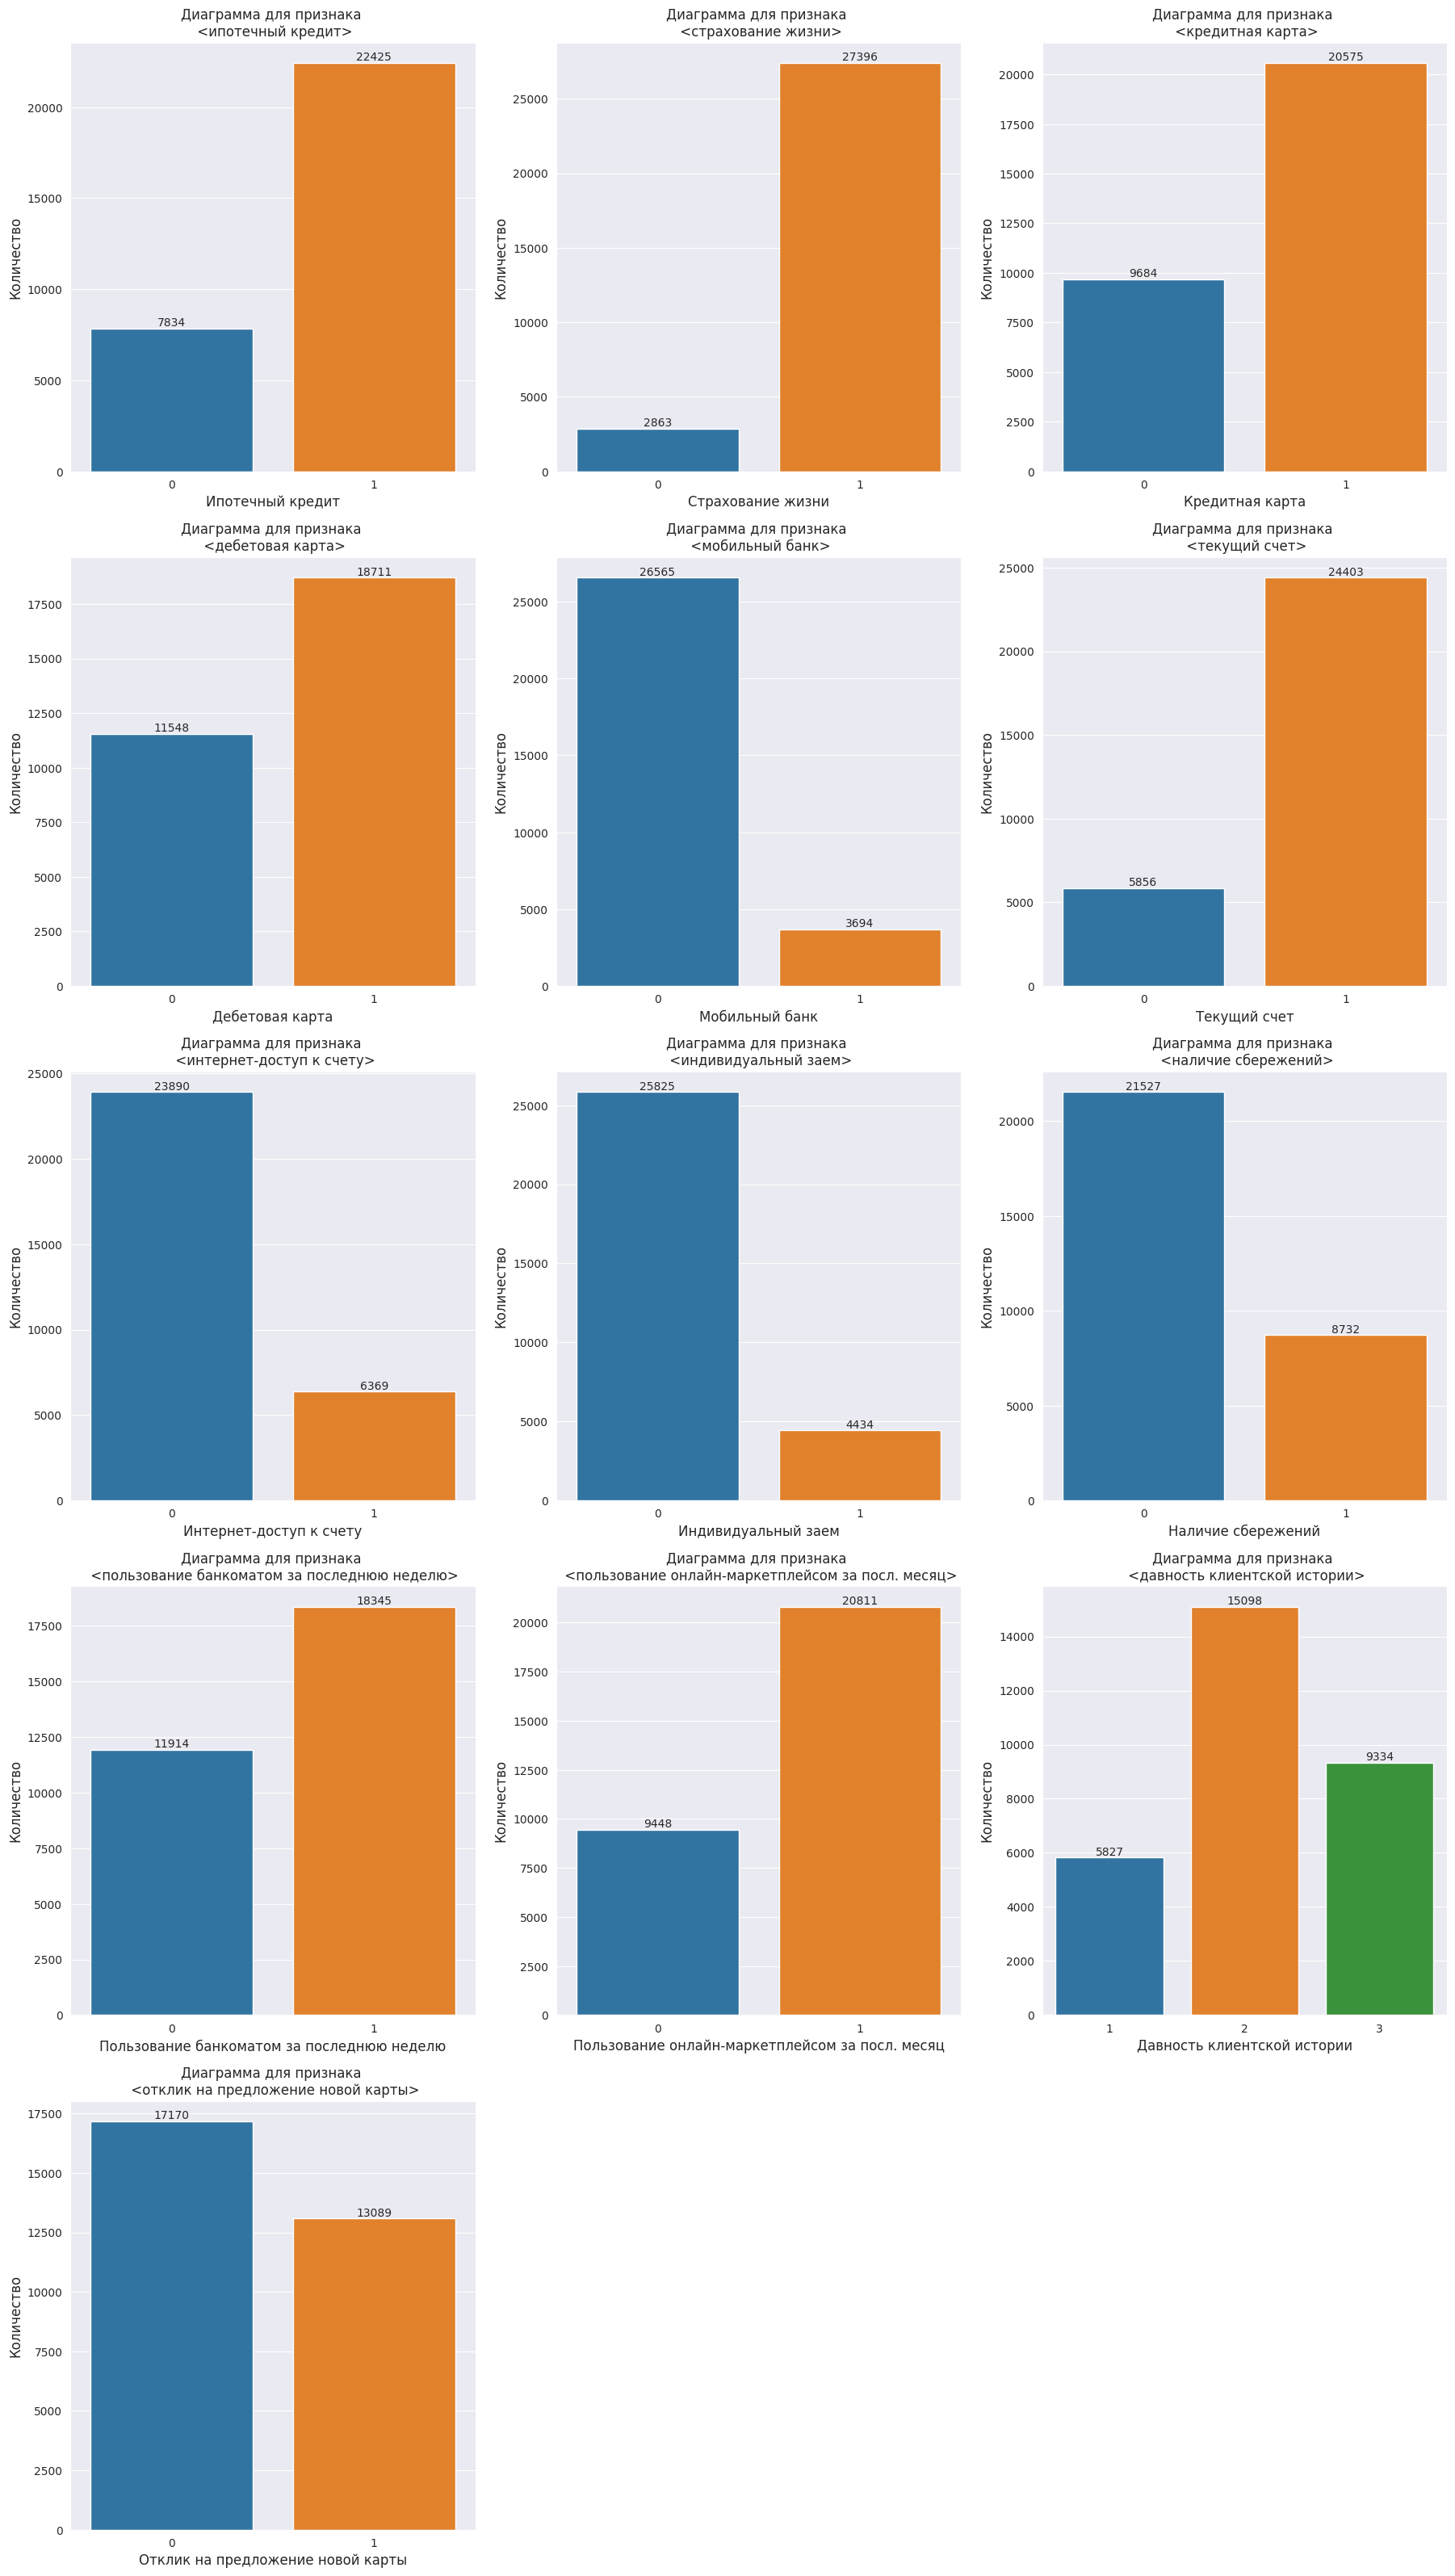

In [ ]:
cat_var = ['mortgage', 'life_ins', 'cre_card', 'deb_card', 'mob_bank',
           'curr_acc', 'internet', 'perloan', 'savings', 'atm_user', 'markpl',
           'cus_leng', 'response']

fig, ax = plt.subplots(5, sharey = True, figsize = (22,40))
sns.set_style("darkgrid")
i = 0
for i, col in enumerate(cat_var):
    plt.subplot(5, 3, i+1)
    ax = sns.countplot(x = col, data = df)
    plt.title("Диаграмма для признака \n <{}>".format(dict_to_rus[col]))
    plt.xlabel(dict_to_rus[col].capitalize(), fontsize = 12)
    plt.ylabel("Количество", fontsize = 12)
    ax.bar_label(ax.containers[0])

Исследуем непрерывный признак `age` (возраст). Посмотрим частотную таблицу данного признака.

In [ ]:
df['age'].value_counts()


45    884
28    884
30    882
41    872
34    862
33    861
52    860
51    859
48    859
50    852
32    848
39    846
35    841
31    841
36    840
46    837
49    831
43    830
42    830
40    830
54    819
44    812
47    810
29    803
53    799
37    798
38    797
60    734
61    727
56    707
58    699
57    679
62    677
55    670
59    670
27    512
63    309
19    163
21    158
24    147
20    135
23    129
26    128
25    128
22    127
18     73
Name: age, dtype: int64

Для визуализации распределения данных по признаку `age` построим диаграмму "Ящик с усами" и гистограмму, на которой отобразим такие показатели статистики, как выборочное среднее, медиана, мода, квантили, значения усов.

Воспользуемся функцией для подсчета нижнего и верхнего усов для признака.

In [ ]:
def calc_boxplot(df_col:pd.Series) -> tuple:
    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col) <= hival, np.asarray(df_col))
    wisklo = np.compress(np.asarray(df_col) >= loval, np.asarray(df_col))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

Показатели статистики по признаку `age` (возраст).

In [ ]:
print("""
    выборочное среднее = {}
    медиана = {}
    мода = {}
    квантили 5 и 97 {}
    значения усов {}.""".format(df.age.mean().round(1),
                                df.age.median(),
                                df.age.mode()[0],
                                (np.percentile(df.age, 5), np.percentile(df.age, 97)),
                                 calc_boxplot(df.age)
                                 ))


    выборочное среднее = 43.4
    медиана = 43.0
    мода = 28
    квантили 5 и 97 (27.0, 62.0)
    значения усов (18, 63).


Построим диаграмму "Ящик с усами" по признаку `age` (возраст).

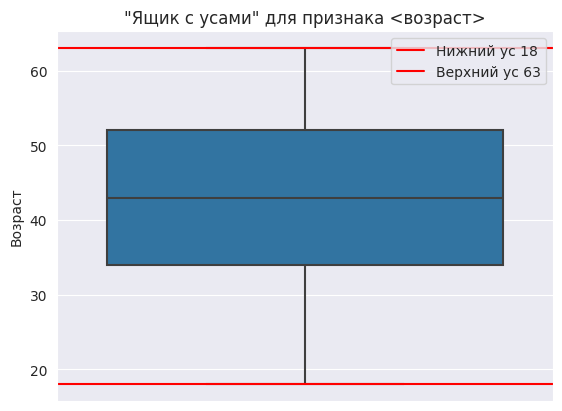

In [ ]:
ax = sns.boxplot(y = df.age)
plt.title('"Ящик с усами" для признака <возраст>', fontsize = 12)
plt.ylabel('Возраст', fontsize = 10)
plt.axhline(calc_boxplot(df.age)[0],
            color = 'red',
            label = 'Нижний ус {}'.format(calc_boxplot(df.age)[0]))
plt.axhline(calc_boxplot(df.age)[1],
            color = 'red',
            label = 'Верхний ус {}'.format(calc_boxplot(df.age)[1]))
plt.legend(loc = 'upper right')


Отметим, что "Ящик с усами" показывает, что нет таких значений возраста, которые лежат за пределами усов, т.е. возраст клиентов находится в границах усов от 18 до 63 лет, так можно сказать, что выбросов нет, этому свидетельствует и то, что выборочное среднее значение и медиана почти одинаковые (43,4 и 43 соответственно).

Построим гистограмму с вертикальными линиями рассчитанных статистик для признак `age` (возраст).

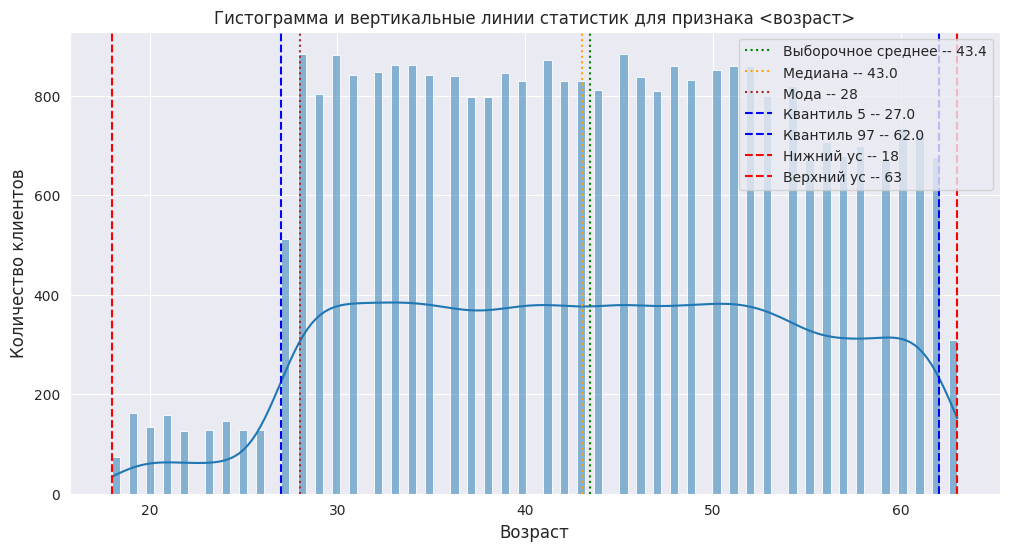

In [ ]:
fig, ax = plt.subplots(sharey = True, figsize = (12, 6))
plt.subplot()
ax = sns.histplot(df.age, bins = 100, kde = True)
plt.title("Гистограмма и вертикальные линии статистик для признака <возраст>")
plt.xlabel(dict_to_rus['age'].capitalize(), fontsize = 12)
plt.ylabel("Количество клиентов", fontsize = 12)
ax.axvline(df.age.mean(),
           color = 'green',
           linestyle = ':',
           label = 'Выборочное среднее -- {}'.format(df.age.mean().round(1)))
ax.axvline(df.age.median(),
           color = 'orange',
           linestyle = ':',
           label = 'Медиана -- {}'.format(df.age.median()))
ax.axvline(df.age.mode()[0],
           color = 'brown',
           linestyle = ':',
           label = 'Мода -- {}'.format(df.age.mode()[0]))
ax.axvline(np.percentile(df.age, 5),
               color = 'blue',
               linestyle = '--',
               label = 'Квантиль 5 -- {}'.format(np.percentile(df.age, 5)))
ax.axvline(np.percentile(df.age, 97),
               color = 'blue',
               linestyle = '--',
               label = 'Квантиль 97 -- {}'.format(np.percentile(df.age, 97)))
ax.axvline(calc_boxplot(df.age)[0],
           color = 'red',
           linestyle = '--',
           label = 'Нижний ус -- {}'.format(calc_boxplot(df.age)[0]))
ax.axvline(calc_boxplot(df.age)[1],
           color ='red',
           linestyle = '--',
           label = 'Верхний ус -- {}'.format(calc_boxplot(df.age)[1]))
plt.legend(loc = 'upper right')

**Вывод**: Средний возраст клиентов и медианное значение почти совпадают, это клиенты в возрасте 43 года. Наиболее часто встречаемый возраст клиентов (мода) 28 лет, сюда можно еще отнести клиентов 30 и 45 лет. Как видно из гистограммы распределение по возрасту отличается от нормального, аномалий не обнаружено. Все значения возраста в границах усов, но стоит заметить, что до 5 квантили значения возраста имеют небольшую частоту, т.е. клиентов в возрасте от 18 до 27 лет немного. Значения возраста после 97 квантили также имеют небольшую частоту, это клиенты в возрасте 63 года. Исходя из исследований, операясь на значения 5 и 97 квантилий, отсеим эти значения, т.е. клиентов в возрасте от 18 до 27 лет и клиентов в возрасте 63 года.

Посмотрим какое количество данных останется после удаления значений по признаку `age` (возраст).

In [ ]:
print(df.shape[0])
df[df.age.between(27, 62)].shape[0]

30259


28762

Перезапишем датафрейм после удаления значений и посмотрим сколько процентов данных удалили.

In [ ]:
df_new = df.shape[0]
df = df[(df.age.isnull())  |
        (df.age.between(27, 62))
        ]
print('Потери составляют {:.2%}'.format((df_new - df.shape[0]) / df_new))

Потери составляют 4.95%


In [ ]:
df

,mortgage,life_ins,cre_card,deb_card,mob_bank,curr_acc,internet,perloan,savings,atm_user,markpl,age,cus_leng,response
1188,0,0,0,0,0,0,0,0,0,1,0,27,1,1
1189,1,1,1,1,0,1,0,0,1,1,0,27,2,1
1190,1,1,0,1,0,0,0,0,0,1,0,27,2,1
1191,1,1,0,0,0,0,0,0,0,1,1,27,1,0
1192,1,1,1,0,0,1,1,0,0,0,1,27,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29945,0,1,1,1,0,1,0,0,1,1,1,62,3,0
29946,1,1,1,0,0,1,0,0,1,1,1,62,3,0
29947,1,1,1,0,0,1,0,0,0,1,1,62,3,0
29948,1,1,1,1,0,1,0,1,1,1,1,62,3,0


## 3. Исследовательский анализ данных

$\blacktriangleright$ В разрезе значений целевого признака (`response` -- Отклик на предложение новой карты	) исследуем распределения признаков.

Имеем следующую разбивку по категориальным и непрерывным признакам.

In [ ]:
cat_var = ['mortgage', 'life_ins', 'cre_card', 'deb_card', 'mob_bank',
           'curr_acc', 'internet', 'perloan', 'savings', 'atm_user', 'markpl',
           'cus_leng', 'response']

cont_var = ['age']

Перезапишем список категориальных признаков `cat_var`, исключив из него целевой признак `response`, так как будем строить диаграммы в разрезе значений данного признака.

In [ ]:
cat_var1 = cat_var[0:12]
print(cat_var1)

['mortgage', 'life_ins', 'cre_card', 'deb_card', 'mob_bank', 'curr_acc', 'internet', 'perloan', 'savings', 'atm_user', 'markpl', 'cus_leng']


Построим столбчатые диаграммы для категориальных признаков.

<ipython-input-21-6915a2506c98>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 2, i+1)
<ipython-input-21-6915a2506c98>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 2, i+1)
<ipython-input-21-6915a2506c98>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 2, i+1)
<ipython-input-21-6915a2506c98>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 2, i+1)
<ipython-input-21-6915a2506c98>:4: MatplotlibDeprecationWarning: Auto-re

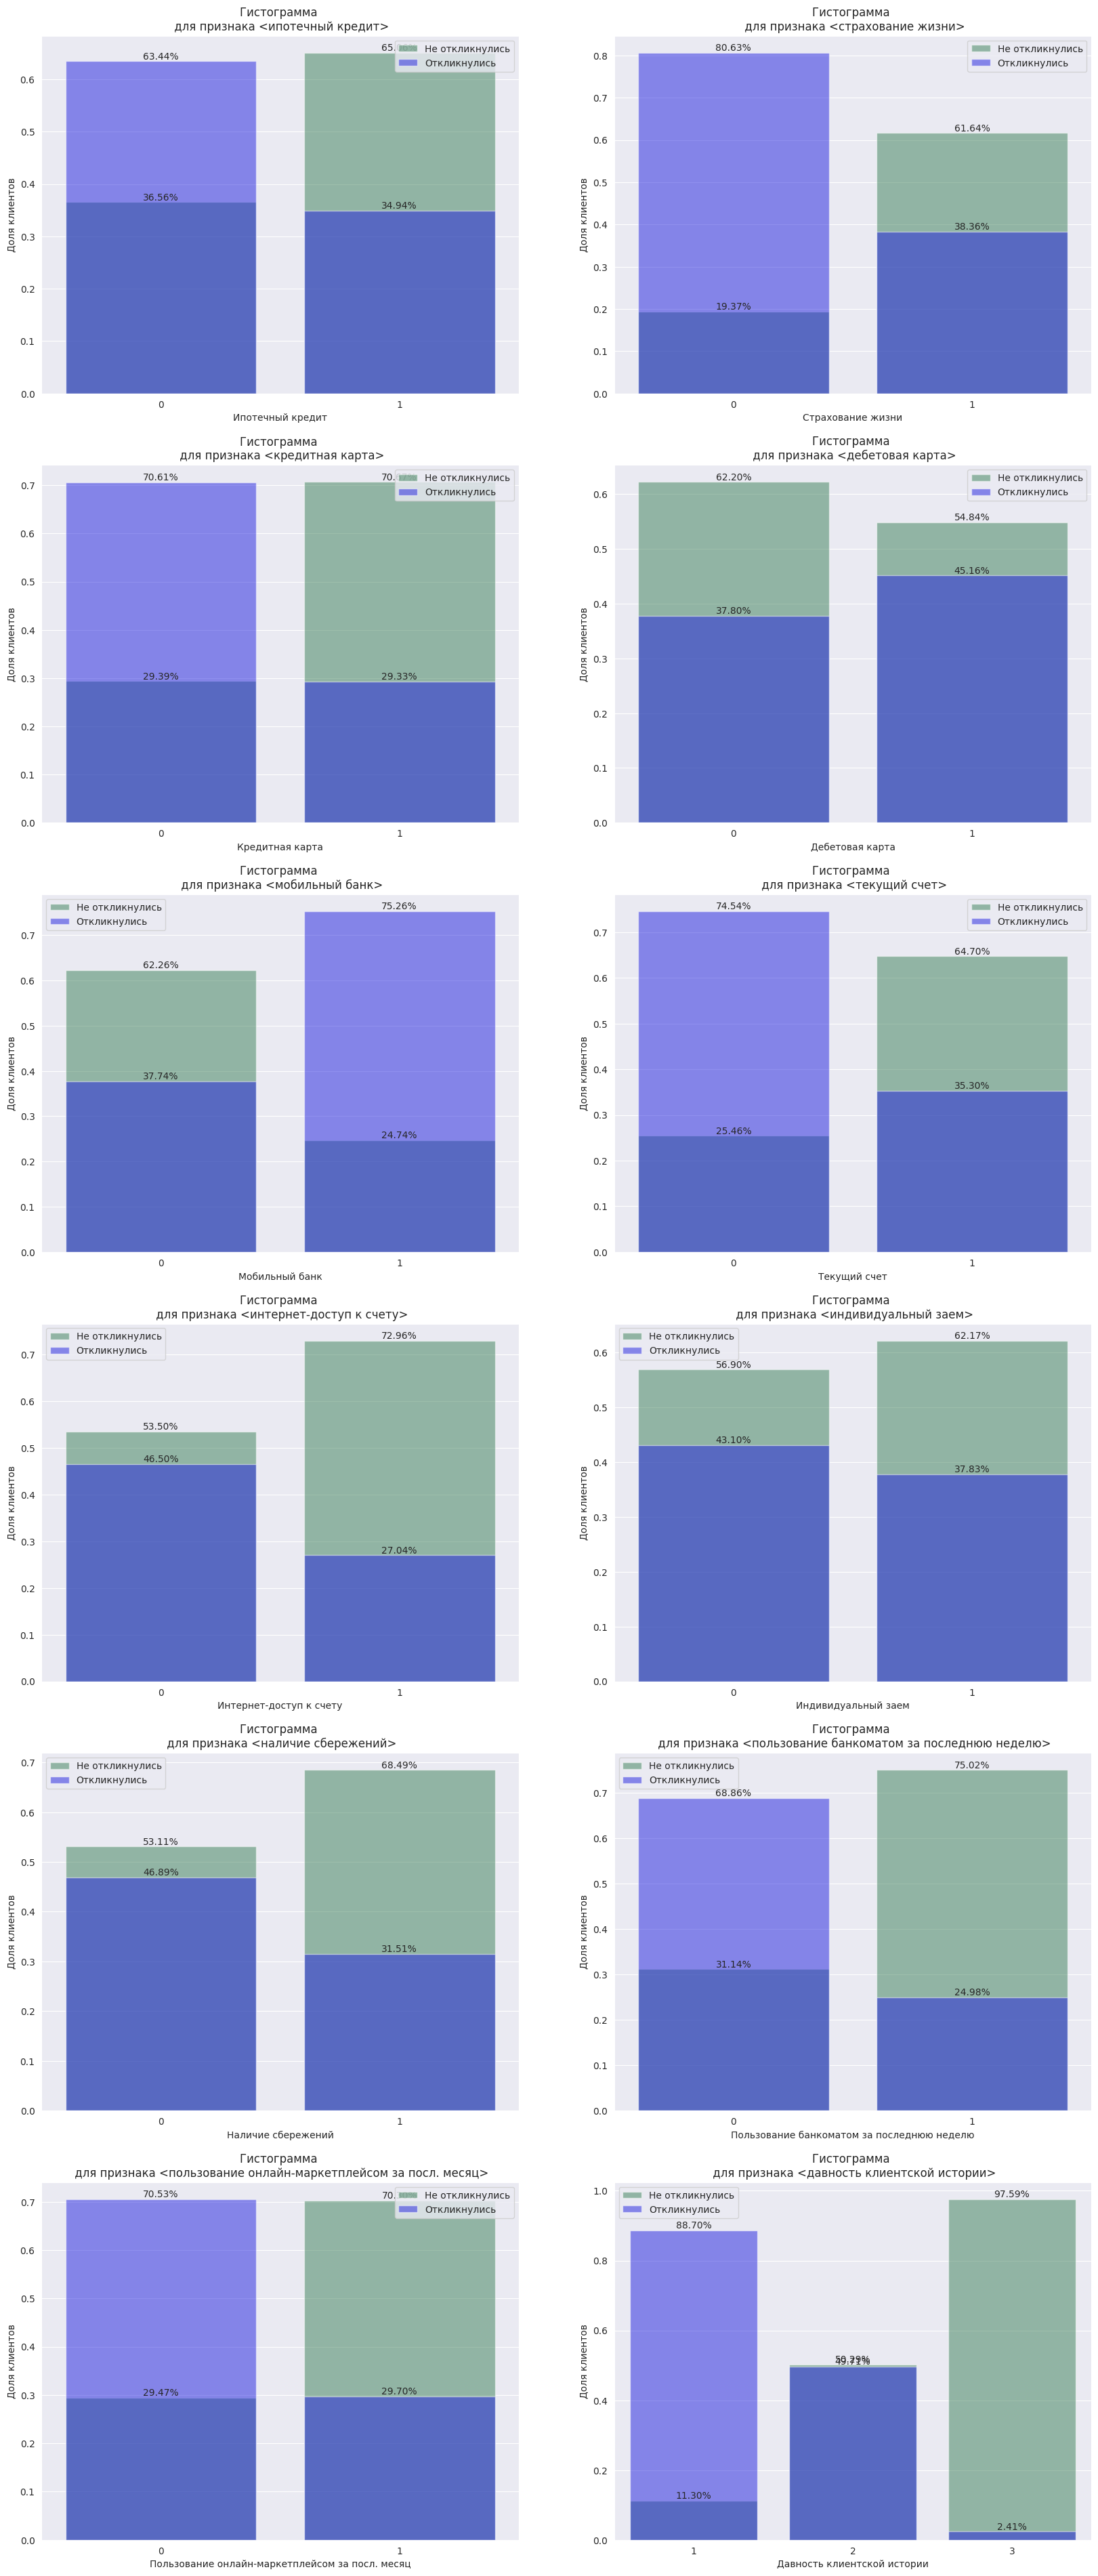

In [ ]:
fig, axes = plt.subplots(6, sharey=True, figsize=(20,48))
i=0
for i, col in enumerate(cat_var1):
    plt.subplot(6, 2, i+1)
    data_all = df[col].value_counts()
    r = (pd.DataFrame([df[df.response == 0][col].value_counts()/data_all,
              df[df.response == 1][col].value_counts()/data_all]).T)
    r.columns = ['0','1']
    ax1 = sns.barplot(x = r.index, y = r['0'], data = r, color='seagreen',
                      alpha = 0.5, label = 'Не откликнулись')
    ax2 = sns.barplot(x = r.index, y = r['1'], data = r, color='blue',
                      alpha = 0.5, label = 'Откликнулись')
    plt.title("Гистограмма \n для признака <{}>".format(dict_to_rus[col]), fontsize = 12)
    plt.xlabel(dict_to_rus[col].capitalize(), fontsize = 10)
    plt.ylabel("Доля клиентов", fontsize = 10)
    plt.legend()
    for p in ax1.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax1.annotate('{:.2f}%'.format(100*y),
            (x.mean(), y),ha='center', va='bottom', fontsize = 10)

Построим гистограмму и распределение для непрерывного признака `age`.

<ipython-input-22-d25a0e24bd47>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df.response == 0]['age'], label = 'Не откликнулись')
<ipython-input-22-d25a0e24bd47>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df.response == 1]['age'], label = 'Откликнулись')


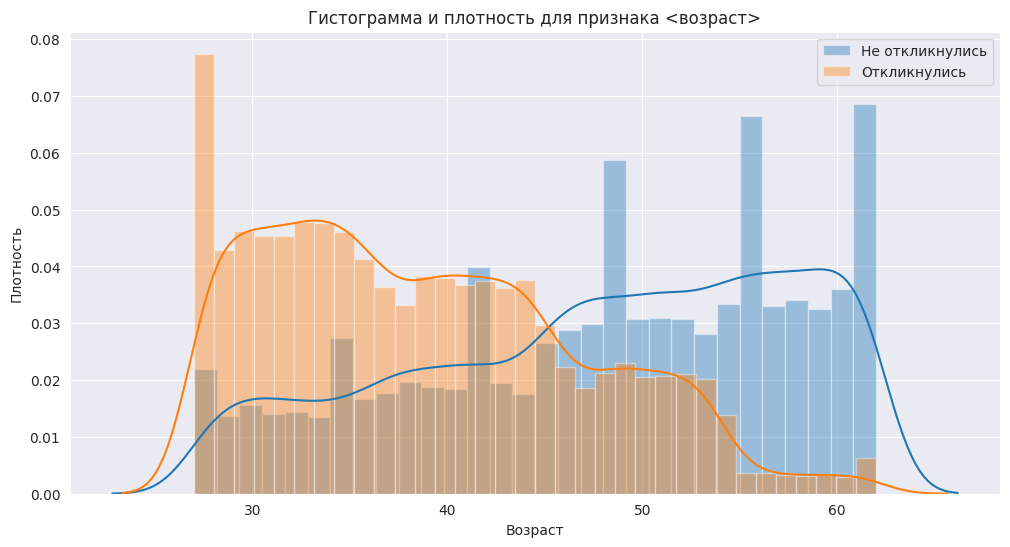

In [ ]:
fig, axes = plt.subplots(sharey = True, figsize = (12, 6))
plt.subplot()
ax = sns.distplot(df[df.response == 0]['age'], label = 'Не откликнулись')
ax = sns.distplot(df[df.response == 1]['age'], label = 'Откликнулись')
plt.title("Гистограмма и плотность для признака <возраст>")
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend()


Посмотрим среднее и медианное значения возраста клиентов, которые откликнулись на предложение новой карты, и клиентов, которые не откликнулись.

In [ ]:
df.groupby('response')['age'].agg(['mean', 'median'])

,mean,median
response,,
0,47.954614,49.0
1,38.857119,38.0


Видим, что статистики отличаются, клиенты, которые откликаются на предложение новой карты моложе, среднее и медианное значения таких клиентов составляют 38 лет, а клиентов, которые не откликаются около 48 лет.

На факт отклика на предложение новой карты оказывают влияние следующие признаки:
- непрерывный признак --> возраст;

- категориальные признаки --> кредитная карта, пользование банкоматом, пользование услугами онлайн-маркетплейсов, давность клиентской истории.

$\blacktriangleright$ Исследуем возможные зависимости целевого признака от объясняющих признаков.

Для исследования зависимостей воспользуемся корреляцией Спирмена, так как, во-первых, эта корреляция работает хорошо не только с числовыми переменными, но и с категориальными, как в нашем случае. Во-вторых, корреляциея Спирмена подходит, так как наши данные хоть и не содержат выбросов, но они не соответствуют нормальному распределению (возраст).

In [ ]:
corr = df.corr(method = 'spearman')

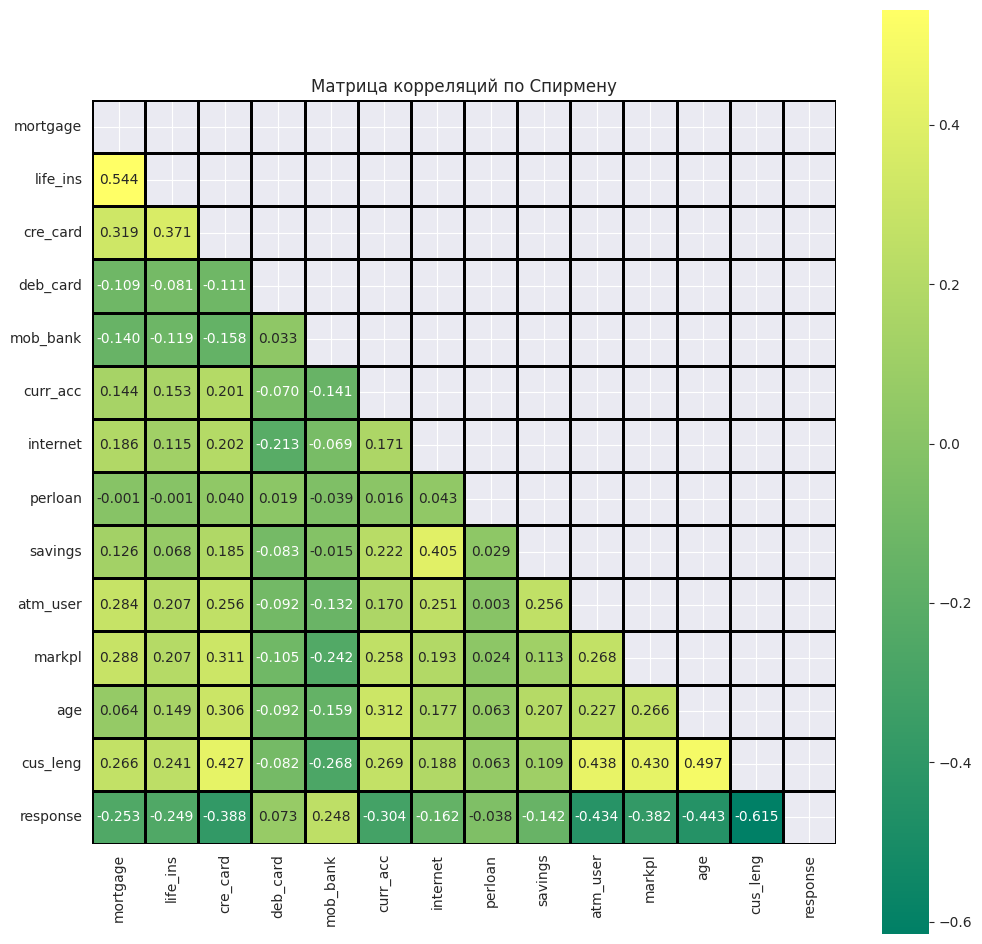

In [ ]:
fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.heatmap(corr, annot = True, square = True,
            cmap = 'summer', fmt = '.3f', linewidths = 1, linecolor = 'black', mask = np.triu(corr))
plt.title('Матрица корреляций по Спирмену')
plt.show()

**Вывод**: Целевой признак `response` не имеет тесной линейной зависимости от какого-либо из объясняющих признаков. Однако заметим, что среди всех признаки `cre_card`, `markpl`, `atm_user`, `age` (с которыми связь слабая) и `cus_leng`(с которым связь средняя) оказывают большее влияние на целевой признак.

$\blacktriangleright$ В разрезе целевого признака составим портреты клиентов платежной системы.

Исходя из исследований распределения признаков в разрезе значений целевого признака (`response` -- Отклик на предложение новой карты) составим портрет клиента, склонного откликнуться на предложение о новой карте.

|Признак|Портрет клиента, откликнувшегося на предложение о новой карте, вероятнее всего:|
|:--:|:--|
|`age`|имеет возраст от 27 до 45 лет|
|`mortgage`|не имеет ипотечный кредит (отклик 63,44%)|
|`life_ins`|не страховал жизнь (отклик 80,63%)|
|`cre_card`|не имеет кредитной карты (отклик 70,61%)|
|`deb_card`|нет разницы имеет дебетовую карту или не имеет (отклик примерно одинаковый 45,16% и 37,80% соответственно)|
|`mob_bank`|имеет мобильный банк (отклик 75,26%)|
|`curr_acc`|не имеет текущий счет в банке (отклик 74,54%)|
|`internet`|не имеет интернет-доступ к счету (отклик 46,50%)|
|`perloan`|нет разницы имеет индивидуальный заем или не имеет (отклик примерно одинаковый 37,83% и 43,10% соответственно)|
|`savings`|не имеет сбережений (отклик 46,89%)|
|`atm_user`|не пользовался банкоматом за последнюю неделю (отклик 68,86%)|
|`markpl`|не пользовался услугами онлайн-маркетплейса за последний месяц (отклик 70,53%)|
|`cus_leng`|имеет давность клиентской истории 1 или 2 (отклик 88,70% и 49,71% соответственно)|

## 4. Составить и проверить гипотезы о наличие/отсутствии различий по признакам портрета клиента.

Сформулируем и проверим гипотезы по каждому признаку.

$\blacktriangleright$ Проверка гипотез по признаку `age` (`возраст`).

`df[df.response == 1].age` --> выборка клиентов, откликнувшихся на предложение новой карты.

`df[df.response == 0].age` --> выборка клиентов, не откликнувшихся на предложение новой карты.

Ранее были выделены точечные оценки в разрезе двух выборок клиентов: выборочное среднее и медиана у выборки клиентов, которые не откликнулись на предложение, больше, чем у выборки клиентов, которые откликнулись на предложение о новой карте (47.954614 > 38.857119; 49.0 > 38.0).

Проверим гипотезы о нормальности закона распределения каждой из имеющихся выборок. Для этого воспользуемся критерием Колмогорова-Смирнова `.kstest()` (критерий Шапиро не подойдет, так как $n > 5000$  и значение $p_{value}$ может быть неточным).

- $Н_0$ -- выборка клиентов, откликнувшихся на предложение новой карты, по показателю `age` распределена нормально.
- $Н_1$ -- выборка клиентов, откликнувшихся на предложение новой карты, по показателю `age` имеет распределение, отличное от нормального.

- $Н_0$ -- выборка клиентов, не откликнувшихся на предложение новой карты, по показателю `age` распределена нормально.
- $Н_1$ -- выборка клиентов, не откликнувшихся на предложение новой карты, по показателю `age` имеет распределение, отличное от нормального.


In [ ]:
print(kstest(df[df.response == 1].age, 'norm',
      args=(df[df.response == 1].age.mean(), df[df.response == 1].age.std()))
)

print(kstest(df[df.response == 0].age, 'norm',
      args=(df[df.response == 0].age.mean(), df[df.response == 0].age.std()))
)



KstestResult(statistic=0.09473008161667568, pvalue=1.651599969922875e-95, statistic_location=35, statistic_sign=1)
KstestResult(statistic=0.0871634940139695, pvalue=4.038542319594043e-110, statistic_location=54, statistic_sign=-1)


В обоих случаях имеем, что $p_{value} < 0.05$. Следовательно, гипотезу $H_0$ о нормальности исследуемых выборок отвергаем на уровне значимости $\alpha = 0.05$. То есть имеем, что законы распределения выборок отличны от нормального закона.

Теперь проверим гипотезу "клиенты, откликнувшиеся на предложение новой карты, по возрастному признаку совпадают с клиентами, не откликнувшимися на предложение новой карты", для этого необходимо проверить гипотезы о значениях параметров для распределений выборок.

Поскольку выборки не имеют нормального распределения, то для проверки гипотез о параметрах воспользуемся критерием Манна-Уитни -- `.mannwhitneyu()`.

Формулировка гипотез:

*   $H_0$ : отсутствует статически значимая разница между возрастом клиентов,
откликнувшихся на предложение новой карты, и клиентов, не откликнувшихся на предложение новой карты.
*   $H_1$ : возраст клиентов, откликнувшихся на предложение новой карты, и клиентов, не откликнувшихся на предложение новой карты, имеет статистически значимые отличия.

In [ ]:
mannwhitneyu(df[df.response == 1].age,
             df[df.response == 0].age)

MannwhitneyuResult(statistic=48661695.5, pvalue=0.0)

Имеем, что $p_{value}=0.0 < 0.05$, следовательно, гипотезу $H_0$ отвергаем. Получаем, что возраст клиентов, откликнувшихся на предложение новой карты, и клиентов, не откликнувшихся на предложение новой карты, имеет статистически значимые отличия.

$\blacktriangleright$ Проверка гипотез по категориальным признакам.

In [ ]:
print(cat_var1)

['mortgage', 'life_ins', 'cre_card', 'deb_card', 'mob_bank', 'curr_acc', 'internet', 'perloan', 'savings', 'atm_user', 'markpl', 'cus_leng']


Так как признаки категориальные, то нет смысла проверять гипотезы о нормальности закона распределения выборок по каждому из признаков.

Проверим гипотезы о значениях параметров распределений выборок, воспользуемся z -критерием для сравнения параметров биноминальных распределений.

Формулировка гипотез:

*   $H_0$ : отсутствует статически значимая разница по признаку `mortgage` (ипотечный кредит) между клиентами, откликнувшимися на предложение новой карты, и клиентами, не откликнувшимися на предложение новой карты ($H_1$ : по признаку ипотечного кредита между клиентами имеется статистически значимые отличия);

*   $H_0$ : отсутствует статически значимая разница по признаку `life_ins` (страхование жизни) между клиентами, откликнувшимися на предложение новой карты, и клиентами, не откликнувшимися на предложение новой карты ($H_1$ : по признаку страхования жизни между клиентами имеется статистически значимые отличия);

*   $H_0$ : отсутствует статически значимая разница по признаку `cre_card` (кредитная карта) между клиентами, откликнувшимися на предложение новой карты, и клиентами, не откликнувшимися на предложение новой карты ($H_1$ : по признаку кредитной карты между клиентами имеется статистически значимые отличия);

*   $H_0$ : отсутствует статически значимая разница по признаку `deb_card` (дебетовая карта) между клиентами, откликнувшимися на предложение новой карты, и клиентами, не откликнувшимися на предложение новой карты ($H_1$ : по признаку дебетовой карты между клиентами имеется статистически значимые отличия);

*   $H_0$ : отсутствует статически значимая разница по признаку `mob_bank` (мобильный банк) между клиентами, откликнувшимися на предложение новой карты, и клиентами, не откликнувшимися на предложение новой карты ($H_1$ : по признаку мобильного банка между клиентами имеется статистически значимые отличия);

*   $H_0$ : отсутствует статически значимая разница по признаку `curr_acc` (текущий счет) между клиентами, откликнувшимися на предложение новой карты, и клиентами, не откликнувшимися на предложение новой карты ($H_1$ : по признаку текущего счета между клиентами имеется статистически значимые отличия);

*   $H_0$ : отсутствует статически значимая разница по признаку `internet` (интернет-доступ к счету) между клиентами, откликнувшимися на предложение новой карты, и клиентами, не откликнувшимися на предложение новой карты ($H_1$ : по признаку интернет-доступа к счету между клиентами имеется статистически значимые отличия);

*   $H_0$ : отсутствует статически значимая разница по признаку `perloan` (индивидуальный заем) между клиентами, откликнувшимися на предложение новой карты, и клиентами, не откликнувшимися на предложение новой карты ($H_1$ : по признаку индивидуального заема между клиентами имеется статистически значимые отличия);

*   $H_0$ : отсутствует статически значимая разница по признаку `savings` (наличие сбережений) между клиентами, откликнувшимися на предложение новой карты, и клиентами, не откликнувшимися на предложение новой карты ($H_1$ : по признаку наличия сбережений между клиентами имеется статистически значимые отличия);

*   $H_0$ : отсутствует статически значимая разница по признаку `atm_user` (пользование банкоматом за последнюю неделю) между клиентами, откликнувшимися на предложение новой карты, и клиентами, не откликнувшимися на предложение новой карты ($H_1$ : по признаку пользования банкоматом за последнюю неделю между клиентами имеется статистически значимые отличия);

*   $H_0$ : отсутствует статически значимая разница по признаку `markpl` (пользование услугами онлайн-маркетплейсов за последний месяц) между клиентами, откликнувшимися на предложение новой карты, и клиентами, не откликнувшимися на предложение новой карты ($H_1$ : по признаку пользования услугами онлайн-маркетплейсов за последний месяц между клиентами имеется статистически значимые отличия);

*   $H_0$ : отсутствует статически значимая разница по признаку `cus_leng` (давность клиентской истории) между клиентами, откликнувшимися на предложение новой карты, и клиентами, не откликнувшимися на предложение новой карты ($H_1$ : по признаку давности клиентской истории между клиентами имеется статистически значимые отличия).

Воспользуемся функцией сразу для всех выборок по проверке гипотез по z - критерию.

In [ ]:
def test_z_criterion(col, goal, alpha):
    import scipy.stats as st
    import math
    gen_group_shape = df[col].value_counts()
    goal_group_shape = df.groupby(col)[goal].sum()
    p = goal_group_shape / gen_group_shape
    p_combined = goal_group_shape.sum() / gen_group_shape.sum()
    difference = p.iloc[0] - p.iloc[1]
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/gen_group_shape.iloc[0] + 1/gen_group_shape.iloc[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях
по признаку <<{col}>> статистически значима.""")
    else: print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях по
признаку <<{col}>> статистически незначима.""")
    print('------------------------------------------------------------')

In [ ]:
for col in cat_var1:
    test_z_criterion(col, 'response', 0.05)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<mortgage>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<life_ins>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<cre_card>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<deb_card>> статистически значима.
------------------------------------------------------------
Результаты проверки 

**Вывод:** по всем призакам между клиентами, откликнувшимися на предложение о новой карте, и клиентами, не откликнувшимися на предложение о новой карте, имеются статистически значимые отличия в долях.

## 5. Построить классификационные модели (дополнительное задание).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Перед началом решения задачи классификации исследуем распределение объектов по целевому классу. Желательно получить примерно равномерно распределение по классам.

In [ ]:
df.groupby('response')['response'].agg('count')/df.shape[0]*100

response
0    57.683749
1    42.316251
Name: response, dtype: float64

Видим, что записей, принадлежащих классу `0`, незначительно больше, чем записей класса `1`.

Выделим набор объясняющих переменных в переменную **X** и целевой признак в переменную **y**.


In [ ]:
var = ['mortgage', 'life_ins', 'cre_card', 'deb_card', 'mob_bank', 'curr_acc',
       'internet', 'perloan', 'savings', 'atm_user', 'markpl', 'cus_leng']

X = df[var]
y = df['response']

Делим на обучающую и тестирующие выборки в соотношении 70/30.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.7,
                                                    random_state = 42)

Масштабируем признаки с помощью метода StandardScaler() -	нормализация средним.

In [ ]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

**Для решения задачи классификации воспользуемся моделями**:

- случайный лес -- RandomForestClassifier(),

- логистическая регрессия -- LogisticRegression().


$\blacktriangleright$ Случайный лес -- RandomForestClassifier()

Обучение модели:

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_st, y_train)
display(model.score(X_train_st, y_train))

0.8192519743704366

Тестирование модели:

In [ ]:
model.score(X_test_st, y_test)
y_pred = model.predict(X_test_st)

Вывод метрик качества:

In [ ]:
print('Метрики качества для RandomForestClassifier', '\n', classification_report(y_test, y_pred))

Метрики качества для RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      4965
           1       0.76      0.73      0.75      3664

    accuracy                           0.79      8629
   macro avg       0.79      0.78      0.78      8629
weighted avg       0.79      0.79      0.79      8629



**Вывод:** Точность модели, измеримая на учебных данных, составляет 82%.

`accuracy` (аккуратность) -- доля правильных ответов алгоритма составляет 79%.

`precision` (точность) -- доля правильных ответов модели в пределах класса - 76%.

`recall` (полнота) -- доля истинно положительных классификаций - 73%.

`F-мера` -- гармоническое среднее точности и полноты - 75%.


$\blacktriangleright$ Логистическая регрессия -- LogisticRegression().

Обучение, тестирование модели, вывод метрик качества:

In [ ]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train_st, y_train)
print(lr.score(X_train_st, y_train))
y_pred = lr.predict(X_test_st)
print('Метрики качества для LogisticRegression', '\n', classification_report(y_test, y_pred))

0.8025132866438186
Метрики качества для LogisticRegression 
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      4965
           1       0.78      0.74      0.76      3664

    accuracy                           0.80      8629
   macro avg       0.80      0.80      0.80      8629
weighted avg       0.80      0.80      0.80      8629



**Вывод:** Точность модели, измеримая на учебных данных, составляет 80%.

`accuracy` (аккуратность) -- доля правильных ответов алгоритма составляет 80%.

`precision` (точность) -- доля правильных ответов модели в пределах класса - 78%.

`recall` (полнота) -- доля истинно положительных классификаций - 74%.

`F-мера` -- гармоническое среднее точности и полноты - 76%.


На полном наборе объясняющих переменных классификационная модель, представляющая собой логистическую регрессию, по установленным метрикам показала чуть лучшие результаты, чем модель классификации случайного леса.